In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(np.abs(laplacian),cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

AssertionError: file could not be read, check with os.path.exists()

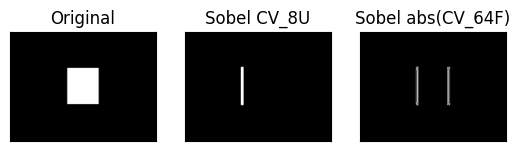

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('1.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

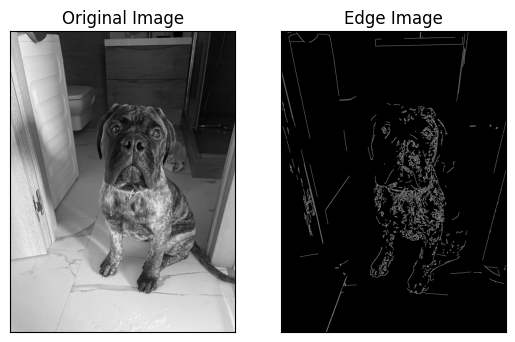

In [72]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('dog.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,150,300)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
import numpy as np
import cv2 as cv

img = cv.imread('flash.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Применение пороговой обработки и поиск контуров
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]

# Вычисление моментов
M = cv.moments(cnt)
print(M)


{'m00': 2.0, 'm10': 64.0, 'm01': 1902.0, 'm20': 2048.333333333333, 'm11': 60864.0, 'm02': 1808802.3333333333, 'm30': 65568.0, 'm21': 1947965.0, 'm12': 57881674.666666664, 'm03': 1720171653.0, 'mu20': 0.33333333333303017, 'mu11': 0.0, 'mu02': 0.3333333332557231, 'mu30': 2.9103830456733704e-11, 'mu21': 2.8830982046201825e-10, 'mu12': 0.0, 'mu03': 2.384185791015625e-07, 'nu20': 0.08333333333325754, 'nu11': 0.0, 'nu02': 0.08333333331393078, 'nu30': 5.1448789686149945e-12, 'nu21': 5.096645728284229e-11, 'nu12': 0.0, 'nu03': 4.2146848510894035e-08}


In [59]:
# Вычисление центра масс (центроида) контура
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

180 289


In [60]:
area = cv.contourArea(cnt)
print(area)

2340.0


In [61]:
perimeter = cv.arcLength(cnt,True)
print(perimeter)

190.97056245803833


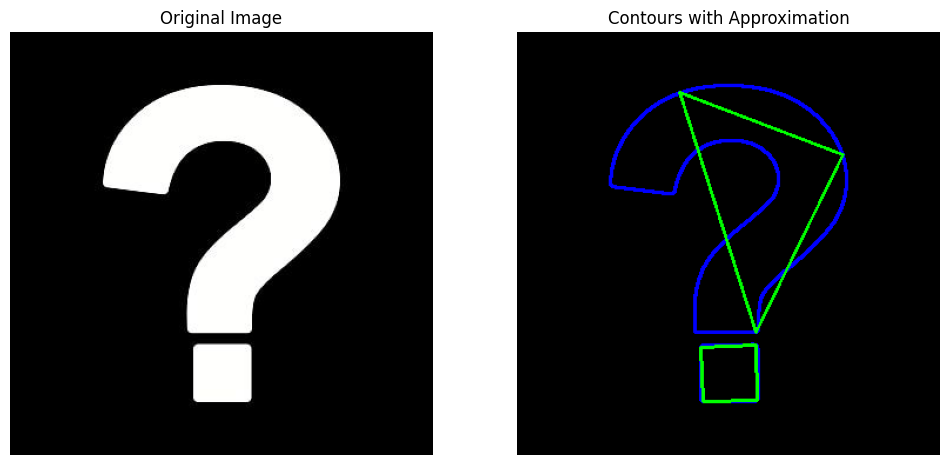

In [49]:
image = cv.imread('2.jpeg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

_, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

contour_image = np.zeros_like(image)

# Перебираем контуры и аппроксимируем их
for cnt in contours:
    epsilon = 0.1 * cv.arcLength(cnt, True)  # Вычисляем epsilon
    approx = cv.approxPolyDP(cnt, epsilon, True)  # Аппроксимация контура

    # Рисуем исходный контур (синий) и аппроксимированный контур (зелёный)
    cv.drawContours(contour_image, [cnt], 0, (255, 0, 0), 2)  # Исходный контур
    cv.drawContours(contour_image, [approx], 0, (0, 255, 0), 2)  # Аппроксимированный контур

contour_image_rgb = cv.cvtColor(contour_image, cv.COLOR_BGR2RGB)
original_image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(contour_image_rgb)
plt.title('Contours with Approximation')
plt.axis('off')
plt.show()


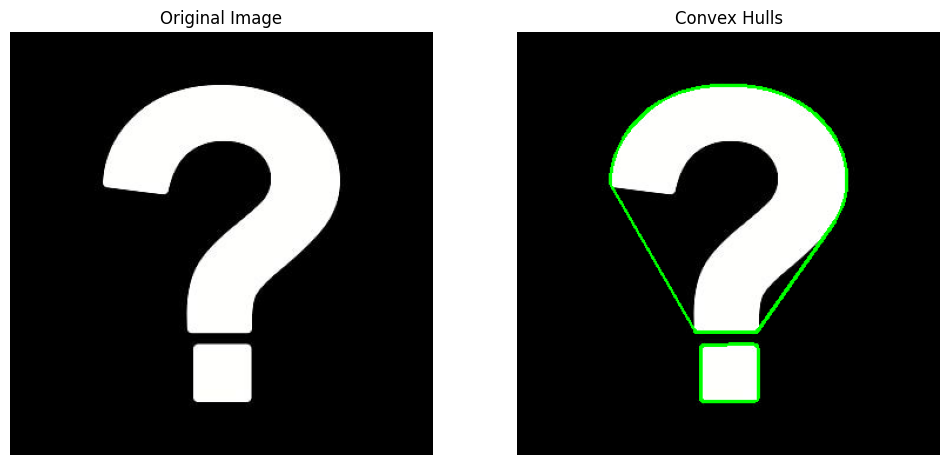

In [50]:
hull_image = image.copy()

for cnt in contours:
    if len(cnt) >= 3:  # для вычисления выпуклой оболочки
        hull = cv.convexHull(cnt)  # Находим выпуклую оболочку
        cv.drawContours(hull_image, [hull], -1, (0, 255, 0), 2) 


hull_image_rgb = cv.cvtColor(hull_image, cv.COLOR_BGR2RGB)
original_image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(hull_image_rgb)
plt.title('Convex Hulls')
plt.axis('off')
plt.show()


In [51]:
k = cv.isContourConvex(cnt)
print(k)

False


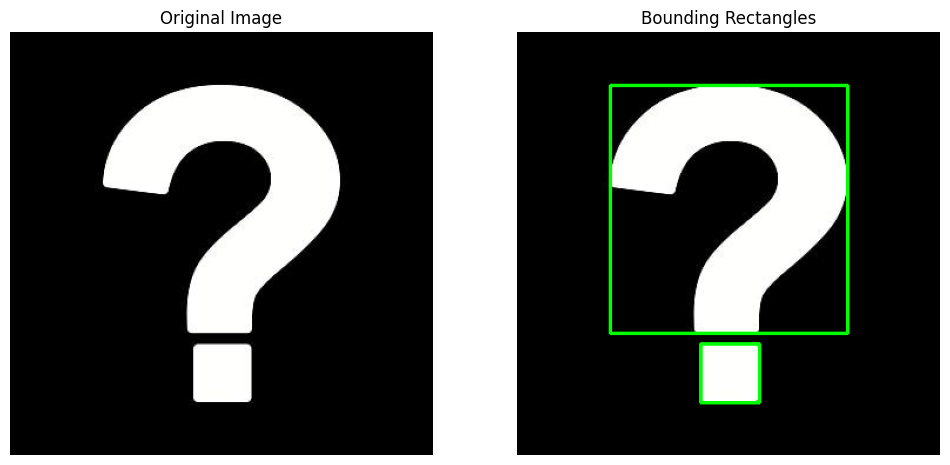

In [52]:
rect_image = image.copy()

for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt) 
    cv.rectangle(rect_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  


rect_image_rgb = cv.cvtColor(rect_image, cv.COLOR_BGR2RGB)
original_image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rect_image_rgb)
plt.title('Bounding Rectangles')
plt.axis('off')
plt.show()


/var/folders/ym/bbhk42tn2ws98cxnr1w8591c0000gn/T/ipykernel_39997/1593692535.py:12: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)          # Преобразуем углы в целые числа


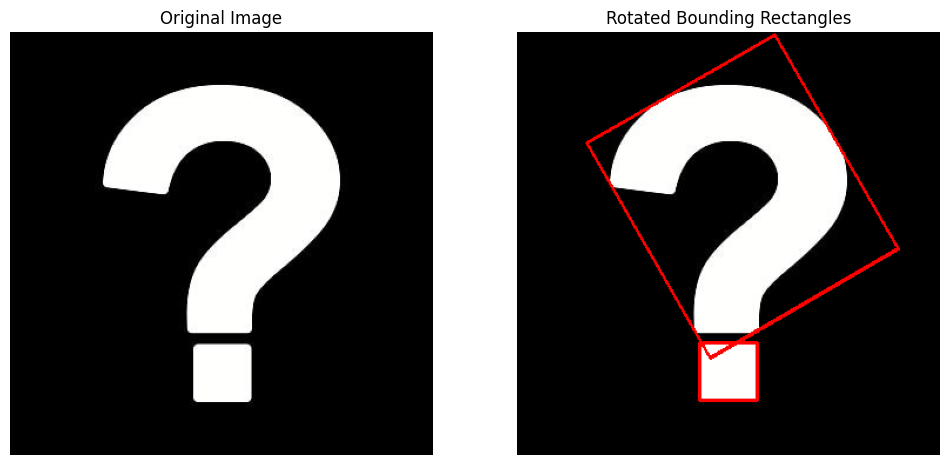

In [57]:
rotated_rect_image = image.copy()

for cnt in contours:
    rect = cv.minAreaRect(cnt)  # Находим минимальный окружённый прямоугольник
    box = cv.boxPoints(rect)    # Преобразуем в углы прямоугольника
    box = np.int0(box)          # Преобразуем углы в целые числа
    cv.drawContours(rotated_rect_image, [box], 0, (0, 0, 255), 2)  # Рисуем прямоугольник


rotated_rect_image_rgb = cv.cvtColor(rotated_rect_image, cv.COLOR_BGR2RGB)
original_image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(rotated_rect_image_rgb)
plt.title('Rotated Bounding Rectangles')
plt.axis('off')
plt.show()


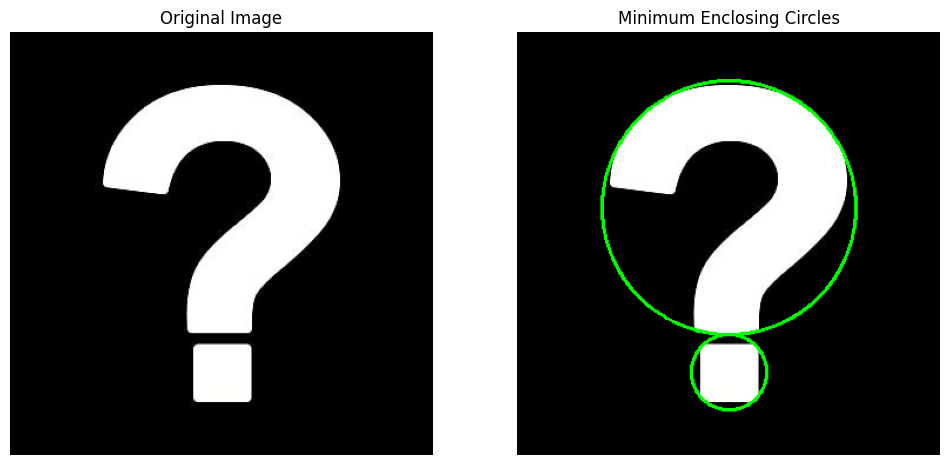

In [54]:
circle_image = image.copy()

for cnt in contours:
    (x, y), radius = cv.minEnclosingCircle(cnt)  # Находим минимальную окружность
    center = (int(x), int(y))                    # Получаем координаты центра
    radius = int(radius)                          # Преобразуем радиус в целое число
    cv.circle(circle_image, center, radius, (0, 255, 0), 2)  # Рисуем окружность

circle_image_rgb = cv.cvtColor(circle_image, cv.COLOR_BGR2RGB)
original_image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(circle_image_rgb)
plt.title('Minimum Enclosing Circles')
plt.axis('off')
plt.show()

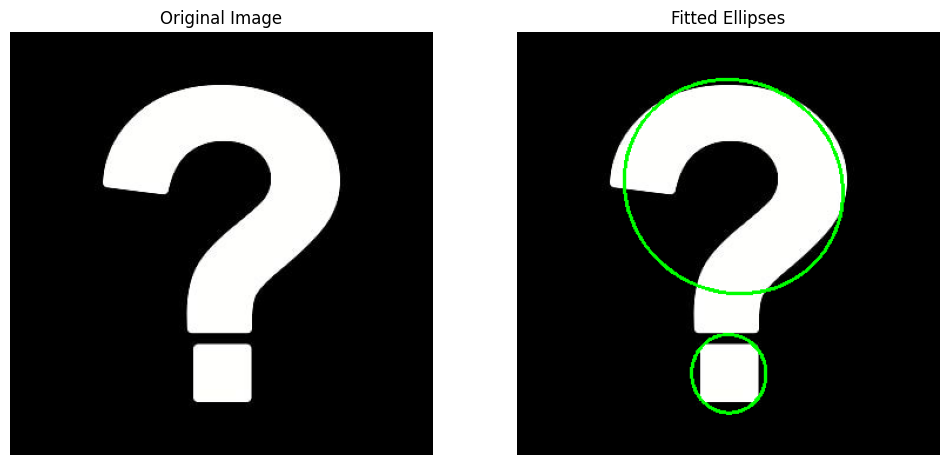

In [55]:
ellipse_image = image.copy()

for cnt in contours:
    if len(cnt) >= 5:  # Эллипс требует минимум 5 точек
        ellipse = cv.fitEllipse(cnt)  # Находим эллипс
        cv.ellipse(ellipse_image, ellipse, (0, 255, 0), 2)  # Рисуем эллипс


ellipse_image_rgb = cv.cvtColor(ellipse_image, cv.COLOR_BGR2RGB)
original_image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(ellipse_image_rgb)
plt.title('Fitted Ellipses')
plt.axis('off')
plt.show()

In [6]:
line_image = image.copy()

for cnt in contours:
    if len(cnt) >= 2:  # Минимум 2 точки для линейной подгонки
        rows, cols = line_image.shape[:2]
        [vx, vy, x, y] = cv.fitLine(cnt, cv.DIST_L2, 0, 0.01, 0.01)  # Находим линию
        lefty = int((-x * vy / vx) + y)  # Вычисляем точку на левой границе
        righty = int(((cols - x) * vy / vx) + y)  # Вычисляем точку на правой границе
        cv.line(line_image, (cols - 1, righty), (0, lefty), (0, 255, 0), 2)  # Рисуем линию

line_image_rgb = cv.cvtColor(line_image, cv.COLOR_BGR2RGB)
original_image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(line_image_rgb)
plt.title('Fitted Lines')
plt.axis('off')
plt.show()

NameError: name 'image' is not defined